In [3]:
# !git clone https://github.com/theschoolofai/YoloV3.git

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [3]:
ls

gdrive/  sample_data/


In [4]:
# !wget https://drive.google.com/file/d/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4/view?usp=sharing

--2020-07-04 17:10:26--  https://drive.google.com/file/d/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.100, 108.177.125.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  68.37K  --.-KB/s    in 0.1s    

2020-07-04 17:10:26 (569 KB/s) - ‘view?usp=sharing’ saved [70014]



In [5]:
# !wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-04 17:10:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
^C


In [4]:
cd /content/gdrive/My Drive/S13/YoloV3

/content/gdrive/My Drive/S13/YoloV3


In [5]:
# !python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


In [14]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-04 17:59:38.259394: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (78 found, 2 missing, 0 empty, 0 duplicate, for 80 images): 100% 80/80 [00:00<00:00, 1184.96it/s]
Caching images (0.0GB): 100% 80/80 [00:00<00:00, 119.73it/s]
Caching labels (78 found, 2 missing, 0 empty, 0 duplicate, for 80 images): 100% 80/80 [00:00<

In [15]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/80 data/customdata/images/image_1.jpg: 384x512 1 jerrys, Done. (0.017s)
image 2/80 data/customdata/images/image_10.jpg: 384x512 1 jerrys, Done. (0.017s)
image 3/80 data/customdata/images/image_11.jpg: 384x512 1 jerrys, Done. (0.017s)
image 4/80 data/customdata/images/image_12.jpg: 320x512 1 jerrys, Done. (0.016s)
image 5/80 data/customdata/images/image_13.jpg: 320x512 1 jerrys, Done. (0.015s)
image 6/80 data/customdata/images/image_14.jpg: 448x512 1 jerrys, Done. (0.017s)
image 7/80 data/customdata/ima

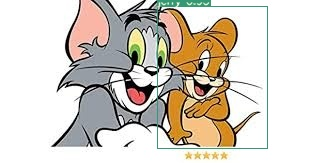

In [23]:
Image(filename='out_out/image_32.jpg', width=600)

In [26]:
!python detect.py --conf-thres 0.3 --output "jerry/" --source "/content/gdrive/My Drive/S13/Tom and Jerry Ep34 Kitty Foiled 1947 003 60fps.mp4"



Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='jerry/', save_txt=False, source='/content/gdrive/My Drive/S13/Tom and Jerry Ep34 Kitty Foiled 1947 003 60fps.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/3306) /content/gdrive/My Drive/S13/Tom and Jerry Ep34 Kitty Foiled 1947 003 60fps.mp4: 384x512 1 jerrys, Done. (0.017s)
video 1/1 (2/3306) /content/gdrive/My Drive/S13/Tom and Jerry Ep34 Kitty Foiled 1947 003 60fps.mp4: 384x512 1 jerrys, Done. (0.017s)
video 1/1 (3/3306) /content/gdrive/My Drive/S13/Tom and Jerry Ep34 Kitty Foiled 1947 003 60fps.mp4: 384x512 1 jerrys, Done. (0.017s)
video 1/1 (4/3306) /content/gdrive/My Drive/S13/Tom and Jerr